### Comparison of the stability of ODEs system

---

$$
\text{Stable case:}
\begin{cases}
x' = -x + xy\\
y’ = -2y + 2y^2
\end{cases} 
$$

In [233]:
import sys
sys.path.append("..")
from Package.DQuadratization import *
from Package.EquationSystem import *
from Package.Combinations import *
from qbee import *
import sympy as sp
from Package.Simulation.numerical import *

In [234]:
x, y = sp.symbols("x, y")

system_stable = [
    sp.Eq(x, -x + x * y),
    sp.Eq(y, -2 * y + 2 *y ** 2)
]

eq_system_stable = EquationSystem(system_stable)
initial_state={x: 0.1, y: 0.01}
simulation_stable = system_to_odeint(eq_system_stable, t=[0, 20, 1000], initial_state=initial_state)

------------------------------------ Input of coefficients ------------------------------------
The system contains the following symbolic constants:
Please give the value of the constants in the form of a dictionary, otherwise the default value will be given.
set()
-------------------------- Input of initial state of the variables ---------------------------
Please give the initial state of the variables in the form of a dictionary, otherwise the default value will be given.
{x, y}


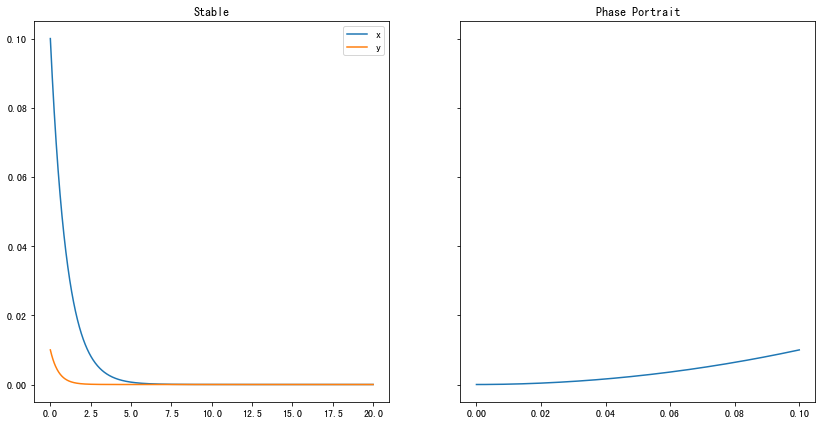

In [235]:
state_stable, variable_index_stable, t_stable = simulation_stable
x_stable_index = variable_index_stable.index(x)
y_stable_index = variable_index_stable.index(y)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
ax1.plot(t_stable, state_stable[:, x_stable_index], label="x")
ax1.plot(t_stable, state_stable[:, y_stable_index], label="y")
ax1.set_title("Stable")
ax1.legend()
ax2.plot(state_stable[:, x_stable_index], state_stable[:, y_stable_index])
ax2.set_title("Phase Portrait")
plt.show()

$$
\text{Unstable case:}
\begin{cases}
x' = -x + xy\\
y' = y - 3x^2 + 2y^2
\end{cases} 
$$

In [236]:
system_unstable = [
    sp.Eq(x, -x + x * y),
    sp.Eq(y, 1 * y - 3 * x ** 2 + 2 *y ** 2)
]

eq_system_unstable = EquationSystem(system_unstable)
simulation_unstable = system_to_odeint(eq_system_unstable, t=[0, 20, 1000], initial_state=initial_state)

------------------------------------ Input of coefficients ------------------------------------
The system contains the following symbolic constants:
Please give the value of the constants in the form of a dictionary, otherwise the default value will be given.
set()
-------------------------- Input of initial state of the variables ---------------------------
Please give the initial state of the variables in the form of a dictionary, otherwise the default value will be given.
{x, y}


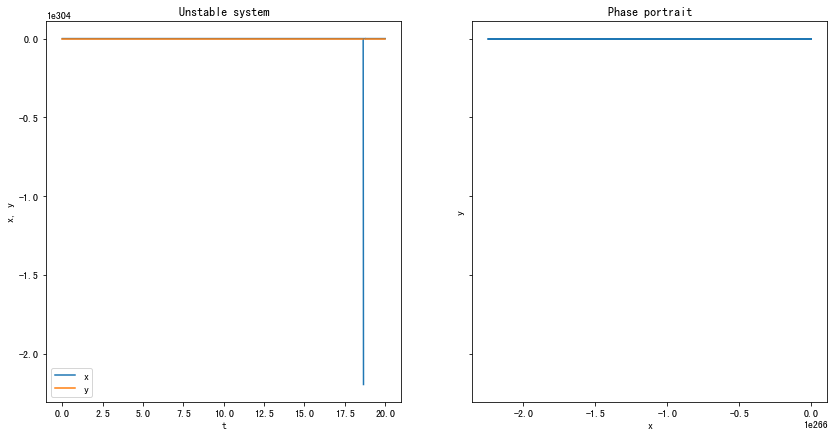

In [237]:
state_unstable, variable_index_unstable, t_unstable = simulation_unstable
x_unstable_index = variable_index_unstable.index(x)
y_unstable_index = variable_index_unstable.index(y)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
ax1.plot(t_unstable, state_unstable[:, x_unstable_index], label="x")
ax1.plot(t_unstable, state_unstable[:, y_unstable_index], label="y")
ax1.set_xlabel("t")
ax1.set_ylabel("x, y")
ax1.set_title("Unstable system")
ax1.legend()
ax2.plot(state_unstable[:, x_unstable_index], state_unstable[:, y_unstable_index])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Phase portrait")
plt.show()

$$
\text{Uncertain case:}
\begin{cases}
x' = -x + xy\\
y’ = -2x^2 + 2y^2
\end{cases}
$$

In [238]:
system_uncertain = [
    sp.Eq(x, -x + x * y),
    sp.Eq(y, -2 * x ** 2 + 2 *y ** 2)
]

eq_system_uncertain = EquationSystem(system_uncertain)
simulation_uncertain = system_to_odeint(eq_system_uncertain, t=[0, 20, 1000], initial_state=initial_state)

------------------------------------ Input of coefficients ------------------------------------
The system contains the following symbolic constants:
Please give the value of the constants in the form of a dictionary, otherwise the default value will be given.
set()
-------------------------- Input of initial state of the variables ---------------------------
Please give the initial state of the variables in the form of a dictionary, otherwise the default value will be given.
{x, y}


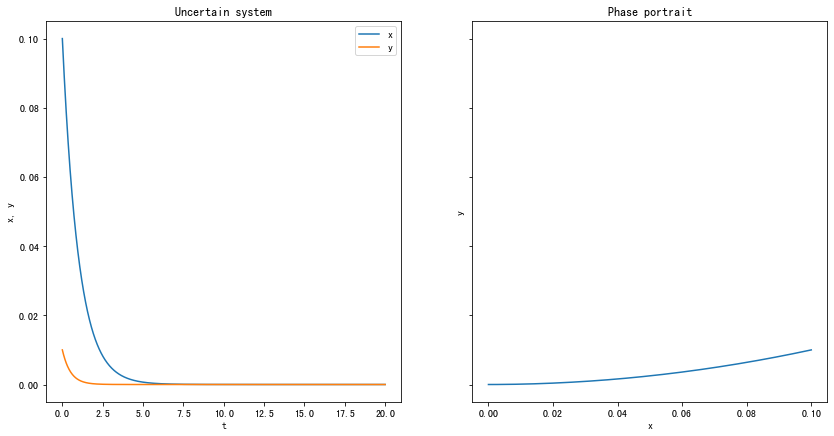

In [239]:
state_uncertain, variable_index_uncertain, t_uncertain = simulation_uncertain
x_uncertain_index = variable_index_uncertain.index(x)
y_uncertain_index = variable_index_uncertain.index(y)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
ax1.plot(t_uncertain, state_uncertain[:, x_uncertain_index], label="x")
ax1.plot(t_uncertain, state_uncertain[:, y_uncertain_index], label="y")
ax1.set_xlabel("t")
ax1.set_ylabel("x, y")
ax1.set_title("Uncertain system")
ax1.legend()
ax2.plot(state_uncertain[:, x_uncertain_index], state_uncertain[:, y_uncertain_index])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Phase portrait")
plt.show()